In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:/Users/4yush/Desktop/datasets/daily_prices.csv")

In [10]:
df.head(10)

,date,open,high,low,close,volume,symbol
0,2025-08-18,231.700,233.12,230.110,230.89,37476188,AAPL
1,2025-08-15,234.000,234.28,229.335,231.59,56038657,AAPL
2,2025-08-14,234.055,235.12,230.850,232.78,51916275,AAPL
3,2025-08-13,231.070,235.00,230.430,233.33,69878546,AAPL
4,2025-08-12,228.005,230.80,227.070,229.65,55672301,AAPL
5,2025-08-11,227.920,229.56,224.760,227.18,61806132,AAPL
6,2025-08-08,220.830,231.00,219.250,229.35,113853967,AAPL
7,2025-08-07,218.875,220.85,216.580,220.03,90224834,AAPL
8,2025-08-06,205.630,215.38,205.590,213.25,108483103,AAPL
9,2025-08-05,203.400,205.34,202.160,202.92,44155079,AAPL


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    400 non-null    object 
 1   open    400 non-null    float64
 2   high    400 non-null    float64
 3   low     400 non-null    float64
 4   close   400 non-null    float64
 5   volume  400 non-null    int64  
 6   symbol  400 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 22.0+ KB


In [12]:
df.describe()

,open,high,low,close,volume
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,261.113977,264.153145,258.357141,261.353000,4.243071e+07
std,118.837681,119.288808,118.251827,118.751901,2.444551e+07
min,141.550000,148.945000,140.530000,144.700000,1.184659e+07
25%,186.212500,190.322500,183.815000,188.210000,2.670183e+07
50%,208.257500,210.288250,205.670000,208.140000,3.728322e+07
75%,264.547500,268.517500,260.385000,264.222500,5.135226e+07
max,555.225000,555.450000,531.900000,535.640000,1.843959e+08


# Data Cleaning and Preparation

In [17]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['symbol', 'date']).reset_index(drop = True)
df['symbol'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

# Missing Values and Duplicates

In [20]:
print(df.isnull().sum())
print(f"Number of duplicate rows: {df.duplicated().sum()}")

date      0
open      0
high      0
low       0
close     0
volume    0
symbol    0
dtype: int64
Number of duplicate rows: 0


# Price Trends (Line Plots)

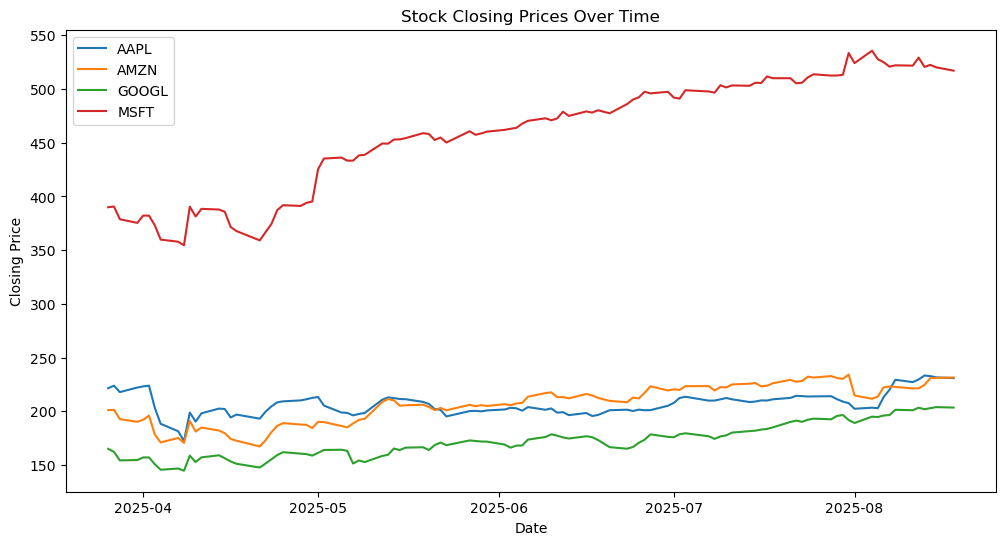

In [25]:
plt.figure(figsize = (12, 6))
for symbol in df['symbol'].unique():
    subset = df[df['symbol'] == symbol]
    plt.plot(subset['date'], subset['close'], label = symbol)

plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

## 📊 Stock Closing Prices Over Time

The line chart above shows the **closing prices of AAPL, AMZN, GOOGL, and MSFT from March to August 2025**.  
Each line represents the day-to-day market valuation of one company, allowing a direct comparison of their price movements over time.  

- **MSFT (red line)** consistently trades at a higher price level than the others and shows a **strong upward trend**, particularly from mid-May onwards, indicating strong investor confidence or positive earnings momentum.  
- **AAPL (blue line)** and **AMZN (orange line)** follow similar trajectories, both exhibiting moderate growth with occasional dips, suggesting that they might be influenced by similar market or sector dynamics.  
- **GOOGL (green line)** has the lowest closing price among the four but demonstrates **steady growth**, narrowing the gap with AAPL and AMZN towards August.  

### 🔎 Insights
1. **Trend Identification** – MSFT is clearly the strongest performer in terms of price appreciation, while GOOGL shows consistent but slower growth.  
2. **Comparative Analysis** – AAPL and AMZN move closely together, which could indicate correlated market reactions to tech sector developments.  
3. **Investor Implications** – MSFT appears more resilient and attractive for growth-focused investors, while AAPL, AMZN, and GOOGL may be better suited for those seeking stability with moderate growth.  


# Distribution of Daily Returns

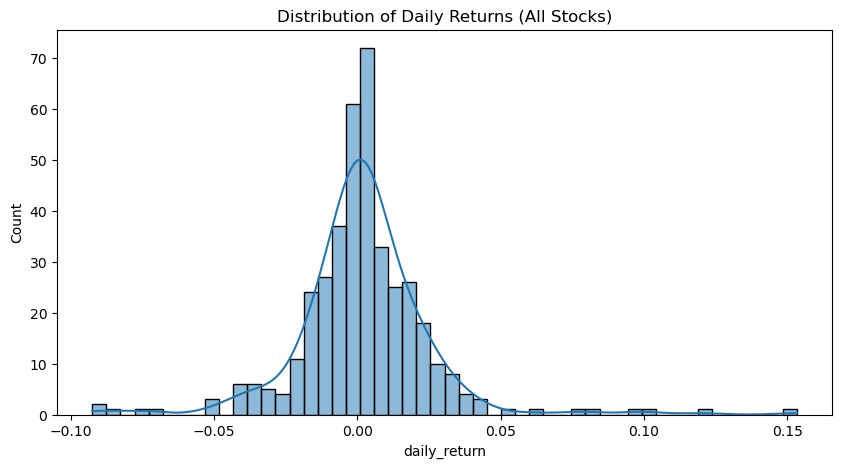

In [28]:
df['daily_return'] = df.groupby('symbol')['close'].pct_change()
plt.figure(figsize=(10,5))
sns.histplot(df['daily_return'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns (All Stocks)")
plt.show()

### Distribution of Daily Returns (All Stocks)

This histogram shows the distribution of daily returns across all four stocks (AAPL, AMZN, GOOGL, MSFT).  

- The distribution is approximately centered around **0%**, meaning most days have small gains or losses.  
- The bell-shaped curve resembles a **normal distribution**, but with **fat tails** (extreme values occur more frequently than in a perfect normal distribution).  
- This highlights the **volatility and risk** in stock markets — occasional large upward or downward moves.  


# Volume Analysis

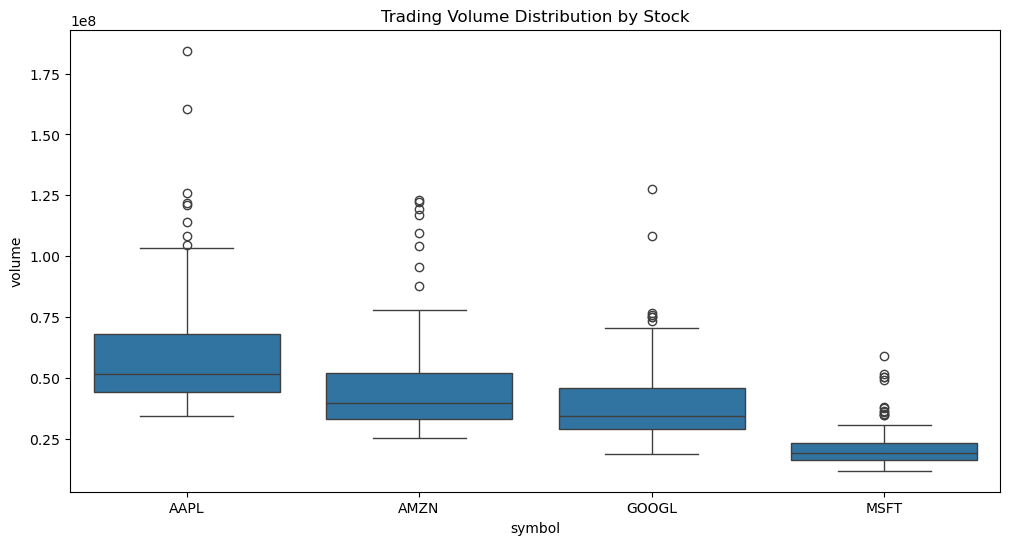

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='symbol', y='volume', data=df)
plt.title("Trading Volume Distribution by Stock")
plt.show()

### Trading Volume Distribution by Stock

This boxplot compares the trading volumes for each stock.  

- **AAPL (Apple)** shows the **highest trading activity** on average, with a wider spread of volume values.  
- **MSFT (Microsoft)** has the **lowest median trading volume**, indicating comparatively less frequent trading.  
- Outliers (shown as dots) represent days with unusually high trading volume, often linked to **earnings announcements, news events, or market shocks**.  
- Comparing distributions helps investors identify which stocks are more **actively traded** and which may be more stable.  


# Correlation of Stock Returns

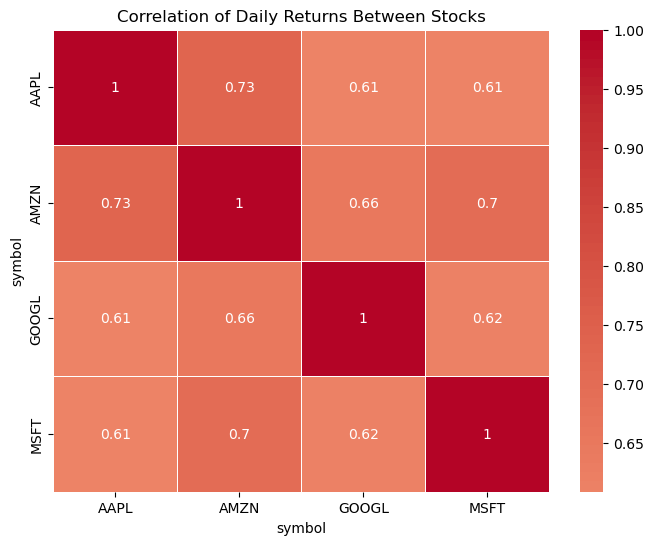

In [30]:
returns_df = df.pivot(index='date', columns='symbol', values='daily_return')
returns_df = returns_df.dropna()
corr = returns_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation of Daily Returns Between Stocks")
plt.show()

### Correlation of Daily Returns Between Stocks

This heatmap shows how daily returns of AAPL, AMZN, GOOGL, and MSFT move together.  

- All correlations are **positive and fairly strong (0.6 – 0.73)**, meaning these tech stocks often move in the same direction.  
- The strongest correlation is between **AAPL and AMZN (0.73)**, suggesting their stock returns tend to move more closely together.  
- Even the lowest correlations (~0.61 between AAPL–GOOGL and AAPL–MSFT) are still high, reflecting the **tech sector’s interconnected performance**.  
- For diversification, these stocks may not provide much **risk reduction**, since they are highly correlated.  
